In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.manifold import TSNE

In [8]:
df = pd.read_csv('./Chronic_Kidney_Dsease_data.csv',index_col="PatientID")

In [9]:
df[df.columns[0:20]]

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c
PatientID,,,,,,,,,,,,,,,,,,,,
1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397
2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989
3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599
4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466
5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,5.239288,0,0,0,0,0,130,89,195.433613,7.309465
1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,6.401662,0,0,0,0,0,127,103,73.606489,4.357399
1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,8.440859,0,0,0,0,0,118,102,163.084321,8.235078


In [10]:
df[df.columns[20:40]]

,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema
PatientID,,,,,,,,,,,,,,,,,,,,
1,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0
2,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0
3,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0
4,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0
5,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,2.191402,23.207131,80.644448,2.926489,240.575604,137.142172,5.277706,9.867489,3.177054,14.331815,184.518899,133.107066,30.859157,320.668245,1,1,5.408175,0,0,0
1656,0.584633,27.145254,118.026779,3.496617,207.392143,136.744038,3.883738,9.411840,2.626317,11.397473,253.709988,131.987735,27.157762,334.818155,0,0,3.229984,1,0,1
1657,0.527432,29.733737,19.283249,3.549633,105.821102,143.887896,4.051049,8.705635,4.246865,16.727631,221.399305,183.307380,51.888571,162.784996,0,1,8.367022,0,0,0


In [11]:
df[df.columns[40:]]

,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,
1,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
2,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
3,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
4,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
5,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,6.973771,1.541242,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1656,0.465757,4.224176,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1657,4.537944,6.061171,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential


In [12]:
df.drop(columns = 'DoctorInCharge',inplace=True)

<Axes: >

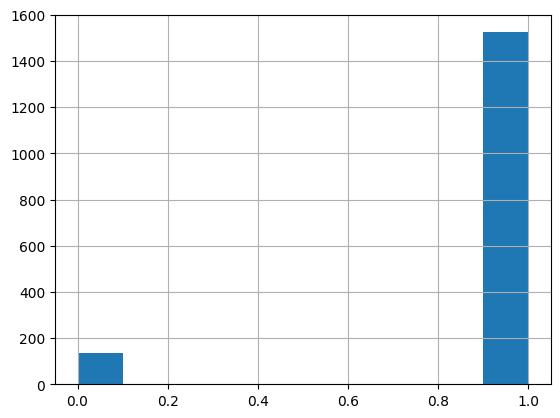

In [13]:
df["Diagnosis"].hist()

# Imbalanced Data

+ Over sampling
+ SMOTE

In [18]:
smo = SMOTE(random_state=817)
X = df.drop("Diagnosis", axis=1)
Y = df["Diagnosis"]

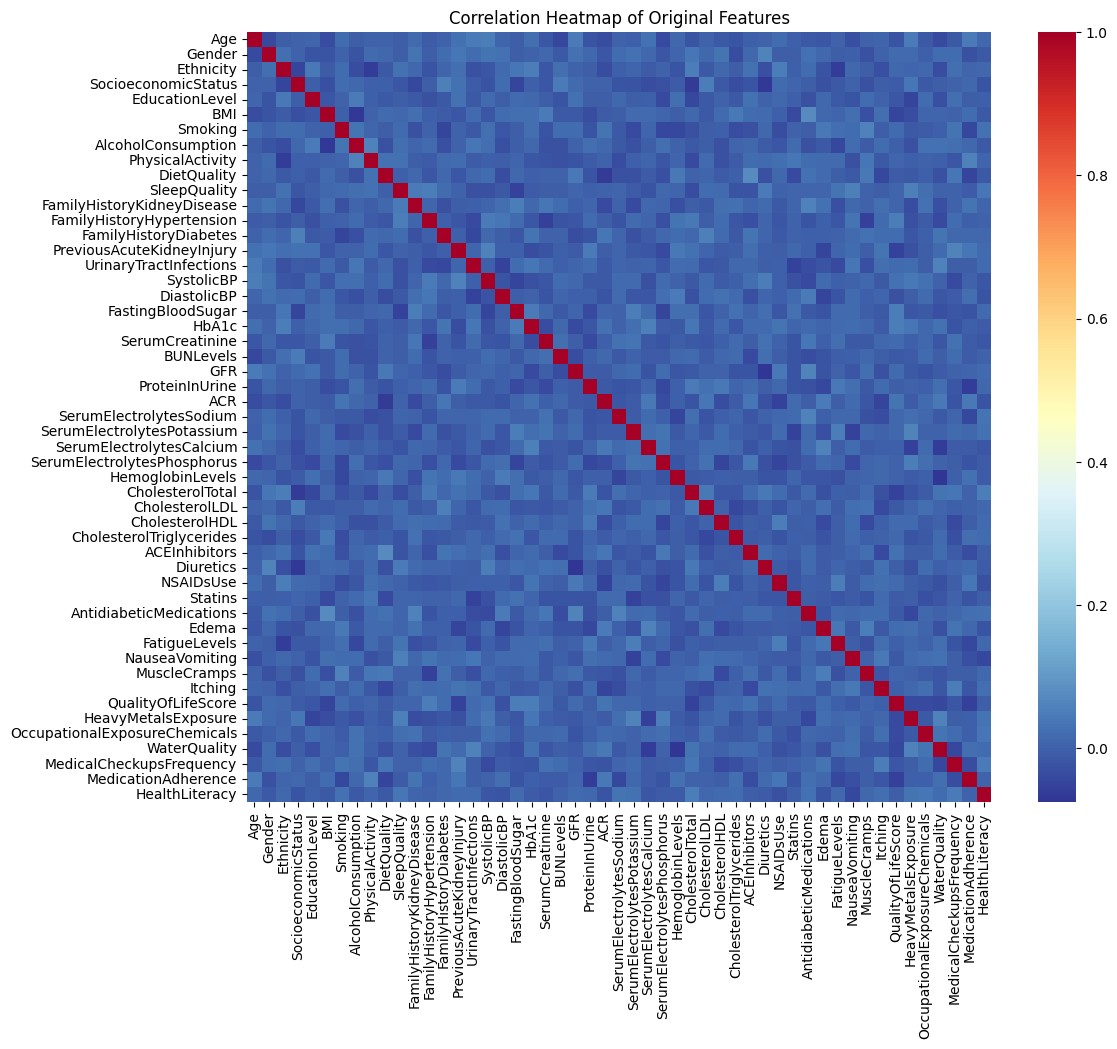

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='RdYlBu_r')
plt.title('Correlation Heatmap of Original Features')
plt.show()


In [20]:
X_resampled,Y_resampled = smo.fit_resample(X,Y)

In [21]:
from collections import Counter

In [22]:
print(f"Before resample: {dict(Counter(Y))}, After resample: {dict(Counter(Y_resampled))}")

Before resample: {1: 1524, 0: 135}, After resample: {1: 1524, 0: 1524}


In [27]:
# 3. Feature Selection
clf = ExtraTreesClassifier(n_estimators=3000, random_state=42)
clf = clf.fit(X_resampled, Y_resampled)
model = SelectFromModel(clf, prefit=True, max_features=20)
X_new = model.transform(X_resampled)

feature_idx = model.get_support()
feature_name = X_resampled.columns[feature_idx]
df_selected = pd.DataFrame(X_new, columns=feature_name)


/home/ilsan/miniconda3/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


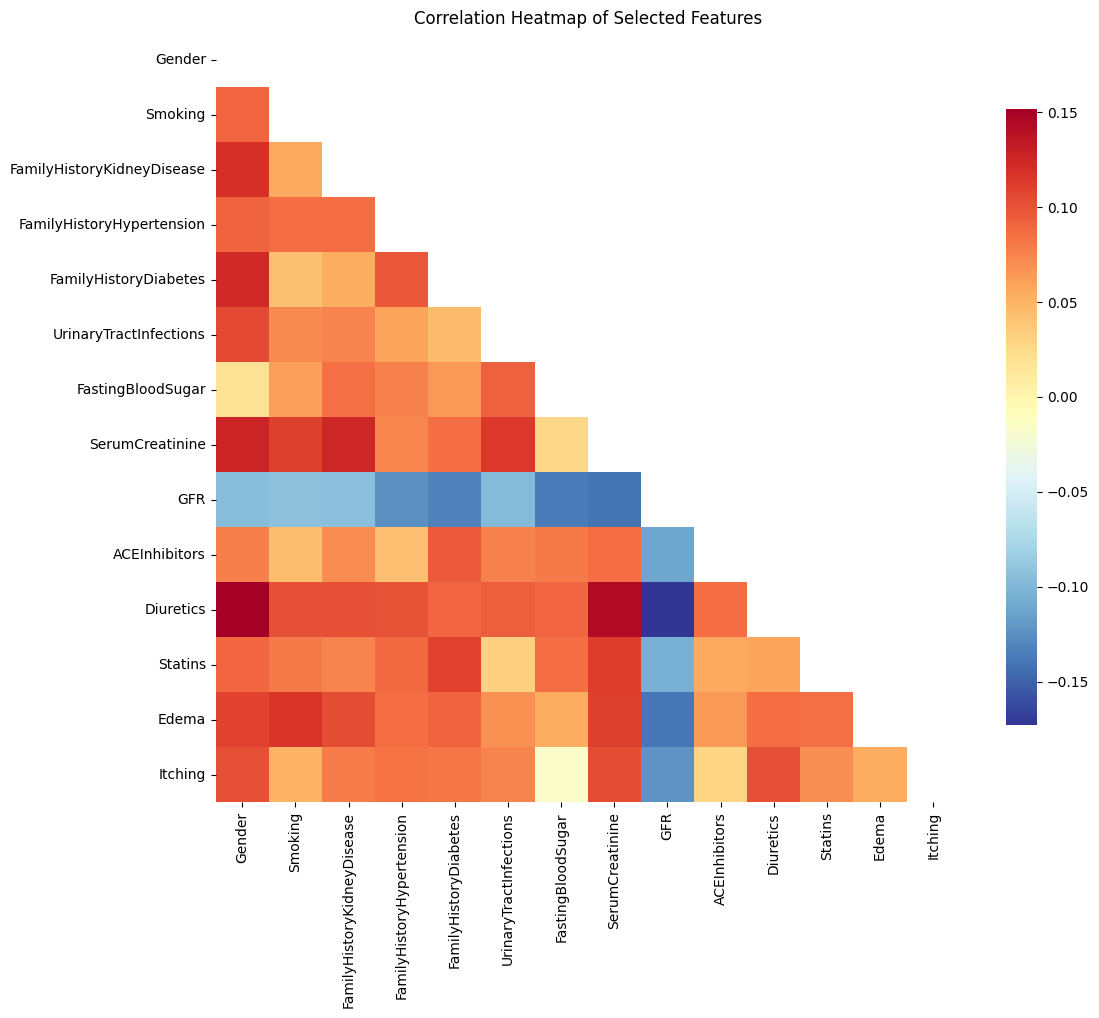

In [28]:
df_cor = df_selected.corr()
mask = np.triu(np.ones_like(df_cor, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(df_cor, cmap='RdYlBu_r', mask=mask, annot=False, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Selected Features')
plt.show()

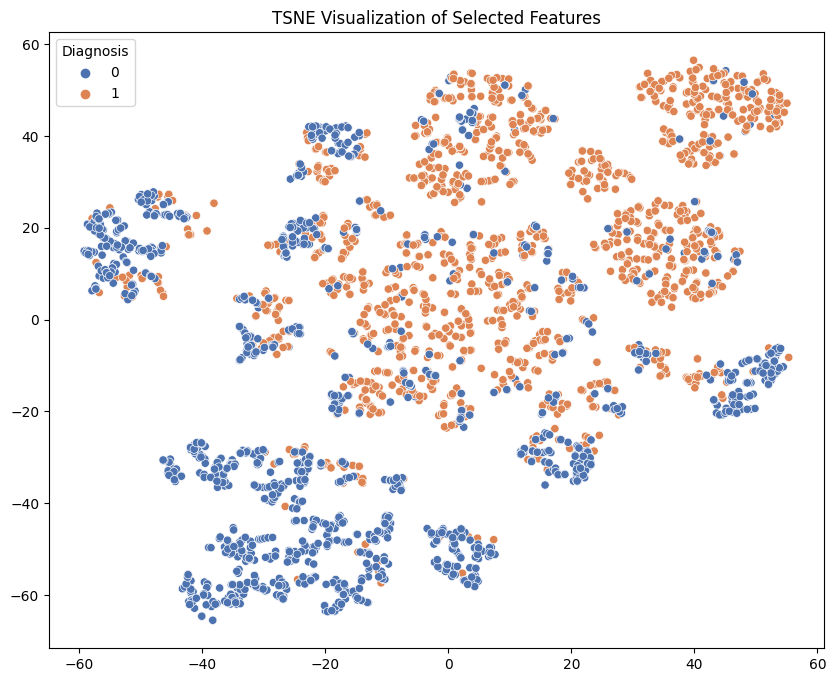

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42).fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=Y_resampled, palette='deep')
plt.title('TSNE Visualization of Selected Features')
plt.show()

In [32]:
X_train.shape

(2286, 14)

In [38]:
len(y_train)

2286

In [37]:
X_test.shape

(762, 14)

In [41]:
X_train.shape

(2286, 14)

In [43]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

/home/ilsan/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


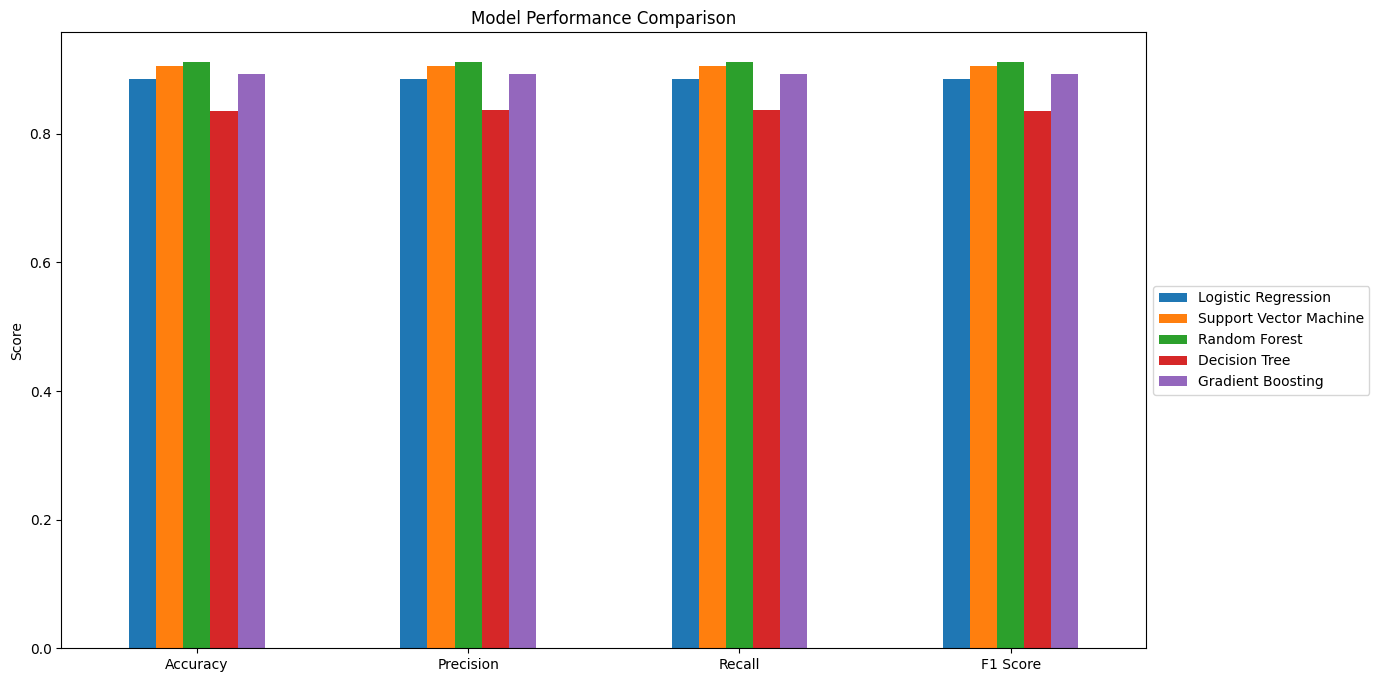

In [53]:
# Prepare train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_resampled, test_size=0.25, random_state=42)

# Function to evaluate model performance and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Support Vector Machine': svm.SVC(max_iter=500),
    'Random Forest': RandomForestClassifier(n_estimators=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500)
}

# Evaluate models and store results
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = [accuracy, precision, recall, f1]

# Convert results to DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot performance metrics for each model
results_df.plot(kind='bar', figsize=(14, 8), title="Model Performance Comparison")
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('model performance Comparison.png',dpi=350,bbox_inches='tight')


In [55]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
from tqdm import tqdm
import time

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': svm.SVC(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=1000)
}

# Define cross-validation methods
cv_methods = {
    'k-Fold (10 folds)': KFold(n_splits=10),
    'StratifiedKFold': StratifiedKFold(n_splits=10),
    'ShuffleSplit': ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
}
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Function to evaluate model using cross-validation
def cross_val_evaluation(model, X, y, cv, scoring):
    scores = {metric: cross_val_score(model, X, y, cv=cv, scoring=scorer) for metric, scorer in scoring.items()}
    return {metric: (values.mean(), values.std()) for metric, values in scores.items()}

# Evaluate models using different validation methods and scoring metrics
cv_results = {method: {metric: {} for metric in scoring} for method in cv_methods}
for method, cv in tqdm(cv_methods.items()):
    for name, model in tqdm(models.items()):
        results = cross_val_evaluation(model, X_scaled, Y_resampled, cv, scoring)
        for metric, (mean, std) in results.items():
            cv_results[method][metric][name] = [mean, std]

# Convert cross-validation results to DataFrame
cv_results_df = {method: {metric: pd.DataFrame(results, index=['Mean', 'Std']).T for metric, results in metrics.items()} for method, metrics in cv_results.items()}

# Combine all results into a single DataFrame for plotting
combined_results = []
for method, metrics in tqdm(cv_results_df.items()):
    for metric, df in tqdm(metrics.items()):
        df['Validation Method'] = method
        df['Metric'] = metric
        combined_results.append(df.reset_index().rename(columns={'index': 'Model'}))

combined_results_df = pd.concat(combined_results)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 943.34it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1056.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 174.83it/s]


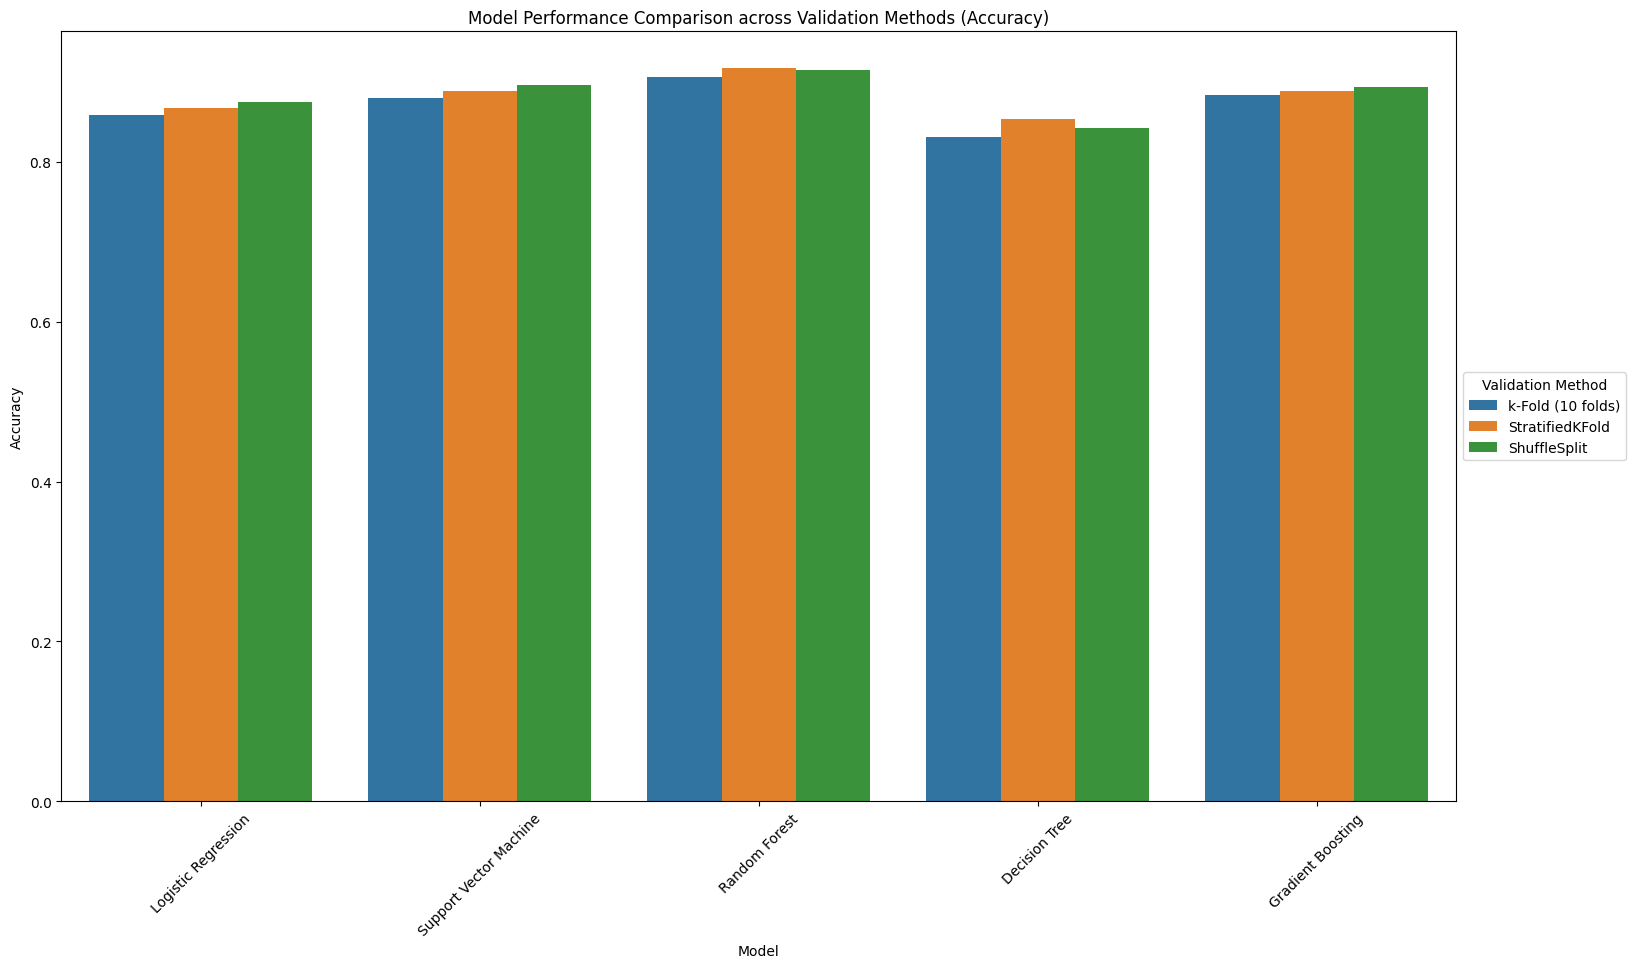

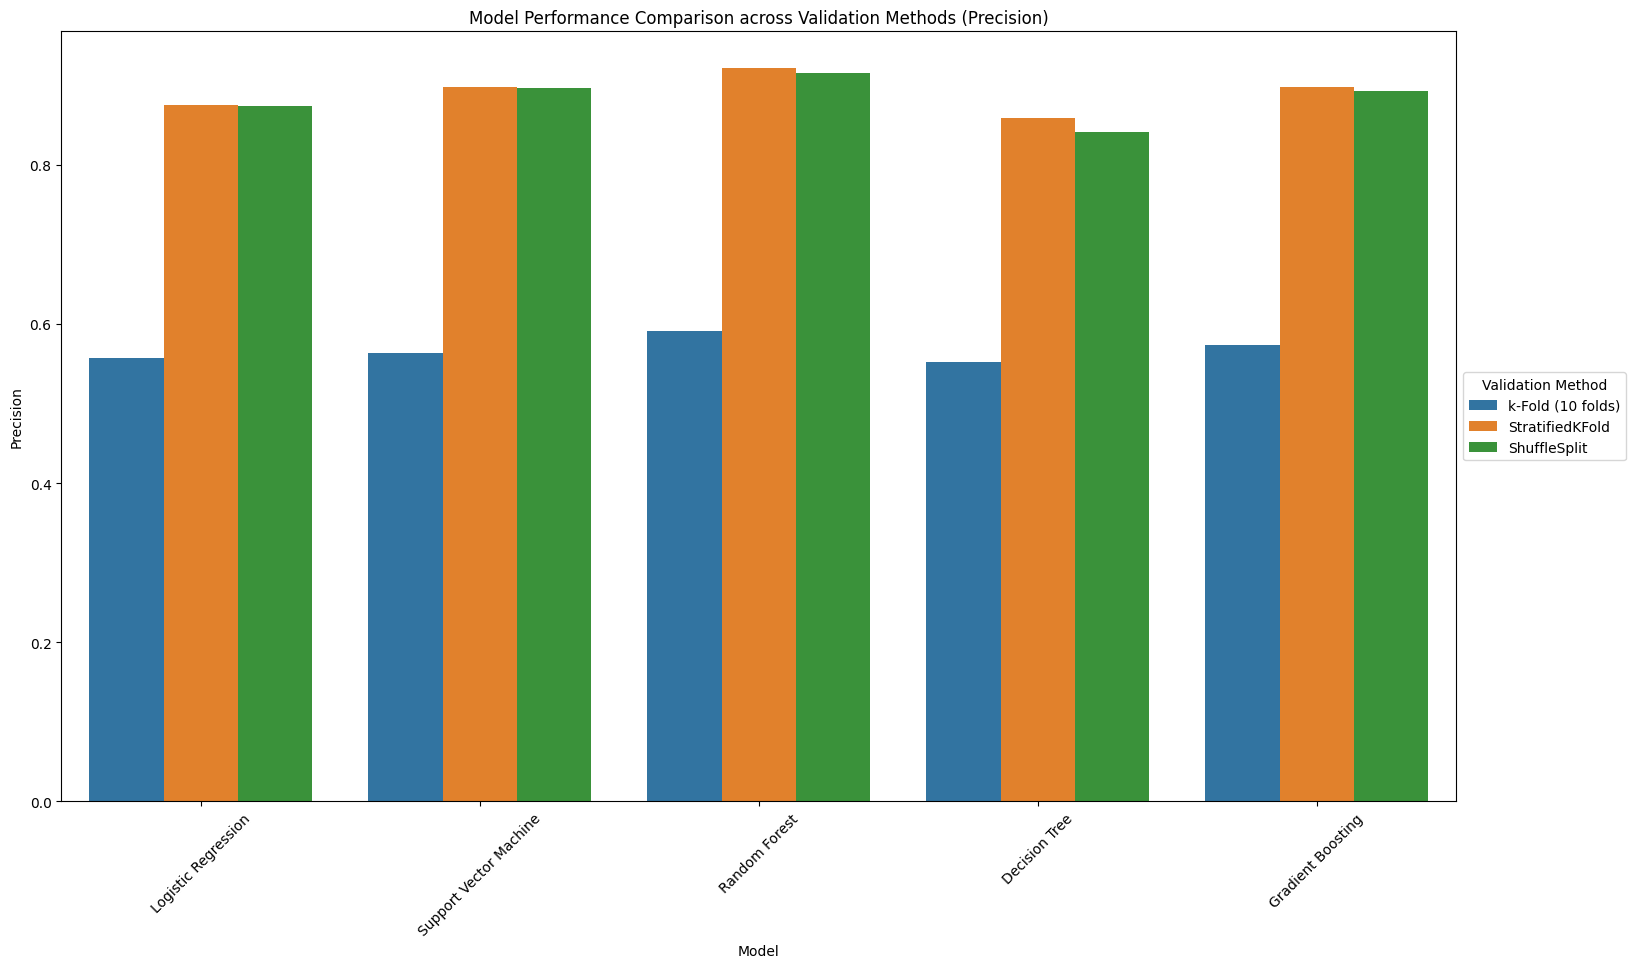

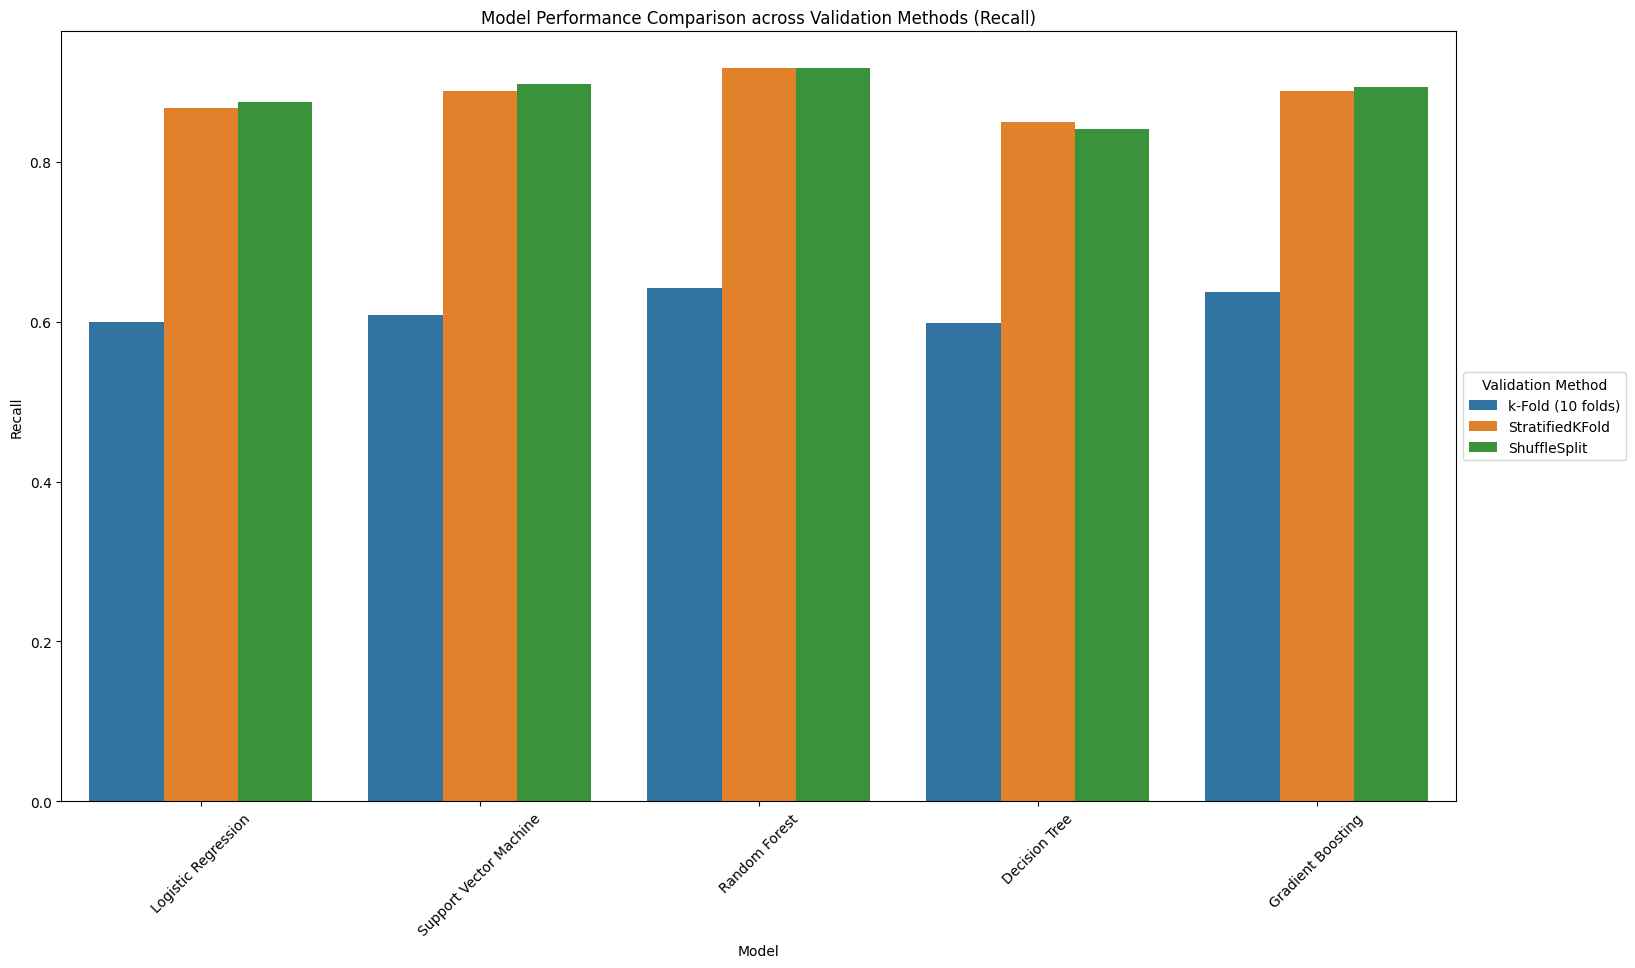

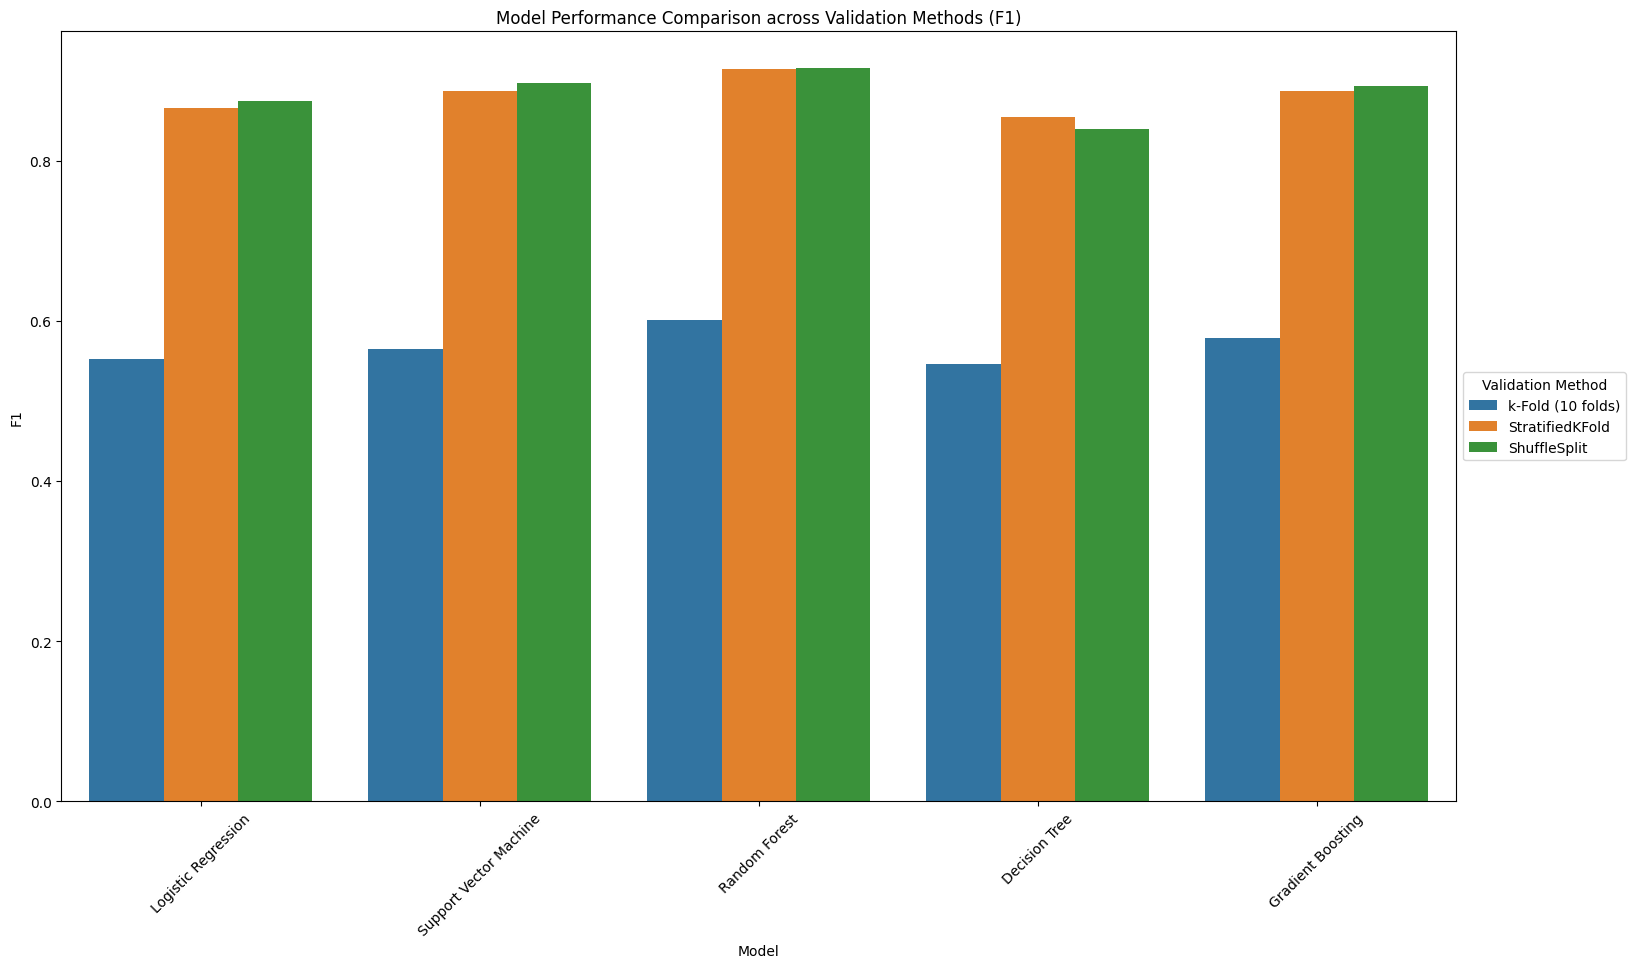

In [72]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    plt.figure(figsize=(18, 10))
    sns.barplot(x='Model', y='Mean', hue='Validation Method', data=combined_results_df[combined_results_df['Metric'] == metric], ci=None, capsize=0.1)
    plt.title(f'Model Performance Comparison across Validation Methods ({metric.capitalize()})')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.legend(title='Validation Method',loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(f'{metric}.png',dpi=350)

In [74]:
combined_results_df

,Model,Mean,Std,Validation Method,Metric
0,Logistic Regression,0.857975,0.046679,k-Fold (10 folds),accuracy
1,Support Vector Machine,0.879963,0.047694,k-Fold (10 folds),accuracy
2,Random Forest,0.909146,0.035550,k-Fold (10 folds),accuracy
3,Decision Tree,0.838282,0.040031,k-Fold (10 folds),accuracy
4,Gradient Boosting,0.883888,0.041089,k-Fold (10 folds),accuracy
0,Logistic Regression,0.557380,0.079087,k-Fold (10 folds),precision
1,Support Vector Machine,0.563896,0.086273,k-Fold (10 folds),precision
2,Random Forest,0.587772,0.093969,k-Fold (10 folds),precision
3,Decision Tree,0.555987,0.080498,k-Fold (10 folds),precision
4,Gradient Boosting,0.573202,0.084696,k-Fold (10 folds),precision
